This note contains the project **" Relation between firearm background checks and gun related deaths in USA from the year 2000-2016 "** using python 3. For this project we will use pandas module, matplotlib, seaborn for data analysis and visualization and markdown process to explain the operations. 

**Student Name : MD Ziaur Rahman Jony**

**Student ID   : 45801088**

### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

### Introduction of US Mass Shooting dataset

This US mass shooting dataset is obtained from an US magazine "Mother Jones" founded in 1976. Mother Jones is an American magazine that focuses on news, commentary, and investigative reporting on topics including politics, the environment, human rights, health and culture. This dataset include a wide range of gun crimes in which four or more people have been either wounded or killed from the year 1982-2021. This dataset mainly focused on distinct phenomenon—from the firearms used and mental health factors to the growing copycat problem.

This dataset is available on - [US Mass Shootings, 1982–2021: Data From Mother Jones’ Investigation](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)

To download the dataset - [click here](https://www.motherjones.com/politics/2012/12/mass-shootings-mother-jones-full-data/)


### Loading the mass shooting dataset

In [2]:
# Loading dataset
mass_data = pd.read_csv('data/Mass_Shootings_Database_1982-2019.csv')
mass_data.head()

,case,location,date,summary,fatalities,injured,Total,location.1,age_of_shooter,prior_signs_mental_health_issues,...,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Orange office complex shooting,"Orange, California",3/31/2021,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,...,-,-,Male,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021
1,Boulder supermarket shooting,"Boulder, Colorado",3/22/2021,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,...,Ruger AR-556; weapon was purchased six days be...,-,Male,https://www.denverpost.com/2021/03/22/police-a...,https://www.thedailybeast.com/boulder-colorado...,-,39.986961,-105.251168,Mass,2021
2,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/2021,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,...,-,White,Male,https://www.ajc.com/news/breaking-multiple-sho...,-,-,34.111653,-84.580376,Spree,2021
3,Springfield convenience store shooting,"Springfield, Missouri",3/16/2020,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,...,-,-,Male,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020
4,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/2020,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,...,-,Black,Male,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020


### Information of dataset

In [3]:
# shape of data
print(mass_data.shape)

(122, 24)


In [4]:
mass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   case                              122 non-null    object 
 1   location                          122 non-null    object 
 2   date                              122 non-null    object 
 3   summary                           122 non-null    object 
 4   fatalities                        122 non-null    int64  
 5   injured                           122 non-null    int64  
 6   Total                             122 non-null    int64  
 7   location.1                        122 non-null    object 
 8   age_of_shooter                    122 non-null    object 
 9   prior_signs_mental_health_issues  122 non-null    object 
 10  mental_health_details             122 non-null    object 
 11  weapons_obtained_legally          122 non-null    object 
 12  where_ob

### Cleanning dataset

In [5]:
# dropping unwanted columns
mass_data=mass_data.dropna() 
print(mass_data.shape)
print(mass_data.isna().sum())

(122, 24)
case                                0
location                            0
date                                0
summary                             0
fatalities                          0
injured                             0
Total                               0
location.1                          0
age_of_shooter                      0
prior_signs_mental_health_issues    0
mental_health_details               0
weapons_obtained_legally            0
where_obtained                      0
weapon_type                         0
weapon_details                      0
race                                0
gender                              0
sources                             0
mental_health_sources               0
sources_additional_age              0
latitude                            0
longitude                           0
type                                0
year                                0
dtype: int64


In [6]:
mass_data.shape

(122, 24)

In [7]:
mass_data.describe()

,fatalities,injured,Total,latitude,longitude,year
count,122.00000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,8.02459,11.844262,19.868852,37.311334,-96.632803,2008.565574
std,7.83029,49.878202,55.373704,5.688566,17.856648,10.492806
min,3.00000,0.000000,3.000000,21.320063,-157.876462,1982.000000
25%,4.25000,1.000000,6.250000,33.752831,-117.219188,1999.250000
50%,6.00000,3.000000,10.000000,38.195115,-90.874832,2012.000000
75%,8.75000,10.000000,17.750000,41.468409,-81.397200,2017.000000
max,58.00000,546.000000,604.000000,48.461367,-71.075913,2021.000000


### Splitting the day month year column

In [8]:
# Splitting date column
mass_data[['Month', 'Day', 'Year']] = mass_data.date.str.split("/",expand=True,)
mass_data.head()

,case,location,date,summary,fatalities,injured,Total,location.1,age_of_shooter,prior_signs_mental_health_issues,...,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,Month,Day,Year
0,Orange office complex shooting,"Orange, California",3/31/2021,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,...,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021,3,31,2021
1,Boulder supermarket shooting,"Boulder, Colorado",3/22/2021,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,...,https://www.denverpost.com/2021/03/22/police-a...,https://www.thedailybeast.com/boulder-colorado...,-,39.986961,-105.251168,Mass,2021,3,22,2021
2,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/2021,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,...,https://www.ajc.com/news/breaking-multiple-sho...,-,-,34.111653,-84.580376,Spree,2021,3,16,2021
3,Springfield convenience store shooting,"Springfield, Missouri",3/16/2020,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,...,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020,3,16,2020
4,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/2020,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,...,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020,2,26,2020


### Dropping unwanted columns

In [9]:
# dropping unwanted columns
mass_data.drop(columns=['date', 'Year'])

,case,location,summary,fatalities,injured,Total,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,...,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,Month,Day
0,Orange office complex shooting,"Orange, California","Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,-,...,Male,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021,3,31
1,Boulder supermarket shooting,"Boulder, Colorado","Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,Brother described him as paranoid; multiple ac...,...,Male,https://www.denverpost.com/2021/03/22/police-a...,https://www.thedailybeast.com/boulder-colorado...,-,39.986961,-105.251168,Mass,2021,3,22
2,Atlanta massage parlor shootings,"Atlanta, Georgia","Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,-,...,Male,https://www.ajc.com/news/breaking-multiple-sho...,-,-,34.111653,-84.580376,Spree,2021,3,16
3,Springfield convenience store shooting,"Springfield, Missouri","Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,-,...,Male,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020,3,16
4,Molson Coors shooting,"Milwaukee, Wisconsin","Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,...,Male,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,Shopping centers spree killings,"Palm Bay, Florida","Retired librarian William Cruse, 59, was paran...",6,14,20,Other,59,Yes,He suffered from paranoid delusions. A judge f...,...,Male,http://articles.latimes.com/1987-04-25/news/mn...,(Supreme Court of Florida Document) http://www...,http://articles.latimes.com/1987-04-25/news/mn...,28.033189,-80.642969,Spree,1987,4,23
118,United States Postal Service shooting,"Edmond, Oklahoma","Postal worker Patrick Sherrill, 44, opened fir...",15,6,21,Workplace,44,Unclear,He was worried he had inherited mental problem...,...,Male,http://news.google.com/newspapers?id=dm8aAAAAI...,http://newsok.com/sherrill-feared-mental-illne...,http://news.google.com/newspapers?id=dm8aAAAAI...,35.667202,-97.429370,Mass,1986,8,20
119,San Ysidro McDonald's massacre,"San Ysidro, California","James Oliver Huberty, 41, opened fire in a McD...",22,19,41,Other,41,Yes,"The day before the shooting, he tried to make ...",...,Male,http://www.utsandiego.com/san-ysidro-massacre/...,http://www.nctimes.com/news/local/article_2ba4...,http://www.utsandiego.com/san-ysidro-massacre/...,32.552001,-117.043081,Mass,1984,7,18
120,Dallas nightclub shooting,"Dallas, Texas","Abdelkrim Belachheb, 39, opened fire at an ups...",6,1,7,Other,39,Yes,"During his last meal with his wife, he confess...",...,Male,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,http://books.google.com/books?id=Hr3OBwP-lbUC&...,32.925166,-96.838676,Mass,1984,6,29


In [10]:
# creating a new column
mass_data['Date'] = mass_data['year'].map(str) + '-' + mass_data['Month'].map(str)
mass_data['Year'] = mass_data['year'].map(str)
mass_data1 = mass_data.set_index('Date')
mass_data1.head()

,case,location,date,summary,fatalities,injured,Total,location.1,age_of_shooter,prior_signs_mental_health_issues,...,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year,Month,Day,Year
Date,,,,,,,,,,,,,,,,,,,,,
2021-3,Orange office complex shooting,"Orange, California",3/31/2021,"Aminadab Gaxiola Gonzalez, 44, allegedly opene...",4,1,5,Workplace,-,-,...,https://www.latimes.com/california/story/2021-...,-,-,33.835420,-117.853790,Mass,2021,3,31,2021
2021-3,Boulder supermarket shooting,"Boulder, Colorado",3/22/2021,"Ahmad Al Aliwi Alissa, 21, carried out a mass ...",10,0,10,Workplace,21,yes,...,https://www.denverpost.com/2021/03/22/police-a...,https://www.thedailybeast.com/boulder-colorado...,-,39.986961,-105.251168,Mass,2021,3,22,2021
2021-3,Atlanta massage parlor shootings,"Atlanta, Georgia",3/16/2021,"Robert Aaron Long, 21, killed eight people at ...",8,1,9,Workplace,21,-,...,https://www.ajc.com/news/breaking-multiple-sho...,-,-,34.111653,-84.580376,Spree,2021,3,16,2021
2020-3,Springfield convenience store shooting,"Springfield, Missouri",3/16/2020,"Joaquin S. Roman, 31, went on a rampage culmin...",4,0,4,Workplace,31,-,...,https://www.kiro7.com/news/trending/ive-been-s...,-,-,37.210432,-93.236860,Mass,2020,3,16,2020
2020-2,Molson Coors shooting,"Milwaukee, Wisconsin",2/26/2020,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,...,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020,2,26,2020


### Visualizing distribution plots of important columns

In [11]:
# creating a new dataset with important parameters
mass_data1=mass_data[[ 'age_of_shooter', 'gender', 'location', 'Total', 'weapons_obtained_legally', 'Year']]
print(mass_data1.shape)
mass_data1.head()

(122, 6)


,age_of_shooter,gender,location,Total,weapons_obtained_legally,Year
0,-,Male,"Orange, California",5,-,2021
1,21,Male,"Boulder, Colorado",10,Yes,2021
2,21,Male,"Atlanta, Georgia",9,-,2021
3,31,Male,"Springfield, Missouri",4,-,2020
4,51,Male,"Milwaukee, Wisconsin",5,-,2020


<AxesSubplot:xlabel='age_of_shooter', ylabel='Total'>

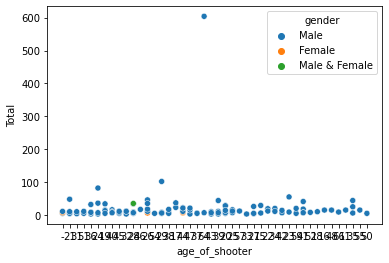

In [12]:
# Scatterplot of age of shooters of different sex and total number of victims
sns.scatterplot(data=mass_data1, x="age_of_shooter", y="Total", hue="gender")

The above scatterplot depicts the age of the shooter for all the shootings and it can also be observed that most of these shootings are done by the males

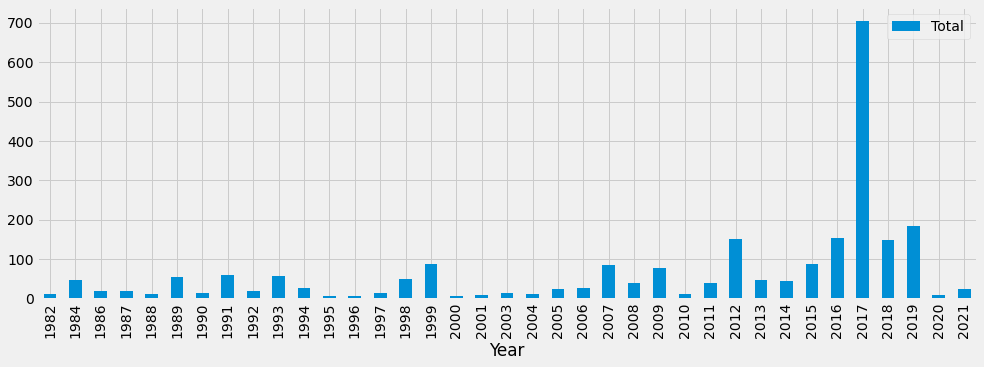

In [13]:
# Plotting total number of victims from different incidents from year 1982 - 2021
k=pd.pivot_table(values='Total',index='Year',data=mass_data1,aggfunc='sum')
plt.style.use('fivethirtyeight')
k.plot(kind='bar',figsize=(15,5))
plt.show()

From the above graph it can be clearly observed that the most number of mass shootings have taken place in the year 2017 and the least the year 1995 and 2000